# Space Walk to Satellites

In the realm of modern space exploration, satellites play a critical role in global communications, weather monitoring, GPS, and scientific research. These advanced technologies orbit Earth in precise, synchronized paths, but like any machinery, they are prone to malfunctions. When satellites experience technical issues, timely repairs are essential to prevent service disruptions and data loss. Astronauts stationed on the International Space Station (ISS) are often tasked with performing spacewalks—extravehicular activities (EVA)—to repair these satellites. Each spacewalk is meticulously planned due to the extreme conditions in space and the limited time astronauts can spend outside the ISS. 

Furthermore, travel between satellites and the station is time-consuming, and repairing a satellite requires specialized tools and processes, making the coordination of spacewalks a complex optimization problem. Since each satellite has a critical window for repair before its systems fail, the challenge lies in scheduling multiple spacewalks efficiently, while adhering to time and resource constraints. The importance of minimizing delays and ensuring all satellites are repaired within their operational deadlines is vital for mission success. 

**Scenario Description**

The present task in this project is to help schedule astronauts' spacewalks to repair 7 malfunctioning satellites that are orbiting Earth. The satellites are arranged in a linear orbital path and need to be repaired before they drift too far off course. Each spacewalk team starts from the International Space Station (ISS) (considered as location 0) and can visit multiple satellites in a single spacewalk.

However, spacewalks are extremely energy-consuming, and an astronaut team can only visit and repair up to 4 satellites per spacewalk. After finishing repairs, they must return to the ISS to recharge their oxygen and tools before they can conduct another spacewalk.

**Parameters**

1. The satellites are evenly spaced along their orbital path.
2. It takes 1 minute for the astronaut team to travel between adjacent satellites (or between the ISS and the first satellite).
3. Each satellite repair takes 2 minutes to complete.
4. The satellites must be repaired by specific times (all in Coordinated Universal Time (UTC)) to avoid system failures:
- Satellite 1: 12:19 AM
- Satellite 2: 12:19 AM
- Satellite 3: 12:25 AM
- Satellite 4: 12:30 AM
- Satellite 5: 12:20 AM
- Satellite 6: 12:35 AM
- Satellite 7: 12:17 AM

5. Each satellite repair must be completed at least 5 minutes before its system failure time.
6. The astronaut team can start their spacewalks at 12:00 AM from the ISS.

**Objective**

The goal is to schedule the astronauts’ spacewalks to minimize the total delay in repairing the satellites while ensuring all repairs are done in time to prevent system failures.

**Constraints**

1. Each spacewalk team can repair no more than 4 satellites per trip.
2. Each satellite must be repaired exactly once across all spacewalks.
3. Each spacewalk must start and end at the ISS.
4. No two spacewalks can overlap; the astronauts must return to the ISS before starting the next spacewalk.

We will build an optimization model to solve this problem. Lets first write out the math formulation. 

<br>

<b>Indicies and Sets: </b>

Locations: $S=\{0,..., N \}$, $s=\{1,..., N \}$

Trips: $\Theta =\{1,..., K \}$, $\theta =\{2,..., K \}$

Satellite: $i, j \in S$

Trip: $k \in \Theta $ 



<br>

<b>Parameters:</b>

$A$: distance matrix

$D_i$: failure time (deadline) for each satellite

$W$: idle time required before faliure time is reached 

$M$: a large real number

$N$: total number of satellites

$T$: time at which the astronaut team can start their spacewalks (12:00 AM, 0 minutes)
 
$U$: repair time per satellite in minutes

$capacity$: the number of satellites an astronaut can service in each trip

<br>

<b>Decision variables:</b>

$
x_{ijk} = \left\{
    \begin{array}\\
        1 & \text{a walk from satellite } i \text{ to } j \ (\forall i \neq j, i, j \in S), \text{ occurs in trip } k \in \Theta\\
        0 & \text{otherwise} \\
    \end{array}
\right.
$

$
y_{ik} = \left\{
    \begin{array}\\
        1 & \text{ satellite } i\ (i \in s) \text{ is serviced during trip } k \in \Theta,  \\
        0 & \text{otherwise} \\
    \end{array}
\right.
$

$u_{ik} $: the starting time of repair work for satellite $i$ during trip $k$, $i \in s$, $k \in \Theta$.

$C_{k}$: the completion time of trip $k$ (when the astronaut returns to ISS from a trip), $k \in \Theta$.

<br>

The problem can be modeled as the following MIP.

$$
\begin{align}
	\text{minimize:} \quad & \text{maximize}\{0,\ u_{ik} - U + W - D_i\} &\\    
	\text{subject to:} \quad & \sum_{j \in s} x_{0jk} = 1, & \forall k \in \Theta \label{eq1}\tag{1}\\    
    & \sum_{i \in s} x_{i0k} = 1,  &\forall k \in \Theta \label{eq2}\tag{2}\\
    & \sum_{j \in s} x_{ijk} = y_{ik}, & \forall i \in s, k \in \Theta \label{eq3}\tag{3}\\    
    & \sum_{i \in s} x_{ijk} = y_{ik},  &\forall j \in s, k \in \Theta \label{eq4}\tag{4}\\
    & \sum_{k \in \Theta} y_{ik} = 1,  & \forall i \in s \label{eq5}\tag{5}\\
	& \sum_{i \in s} y_{ik} \leq capacity,  &\forall k \in \Theta  \label{eq6}\tag{6}\\
    & C_{0} = \sum_{i \in S} \sum_{j \in S} A_{ij}x_{ij0} + U \sum_{i \in s} y_{i0} &  \label{eq7}\tag{7}\\
    & C_{k} = C_{k-1} + \sum_{i \in S} \sum_{j \in S} A_{ij}x_{ijk} + U \sum_{i \in s} y_{ik}, &\forall k \in \theta \label{eq8}\tag{8}\\
    & 0 \leq u_{ik} \leq M * y_{ik},  & \forall i \in s, k \in \Theta   \label{eq9}\tag{9}\\
    & u_{ik} + M * (1- y_{ik}) \geq C_{k-1},  & \forall i \in s, k \in \theta   \label{eq10}\tag{10}\\
    & u_{ik} + M * (1- y_{ik}) \geq C_{k-1} +  A_{0,i},  & \forall i \in s, k \in \theta   \label{eq11}\tag{11}\\
    & u_{i0} + M * (1- y_{i0}) \geq A_{0i}, \quad\qquad & \forall i \in s,   \label{eq12}\tag{12}\\
    & u_{ik} + U + A_{ij} \leq u_{jk} + M * (1- x_{ijk}),  & \forall i,j \in s, k \in \Theta   \label{eq13}\tag{13}\\
\end{align}
$$

In [37]:
################################################
# Loading libraries
################################################
#!pip install --quiet geopy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import cvxpy as cp
import math
from scipy.spatial import distance_matrix
# from geopy import distance # Library for geographical calculations

Distance Matrix is:

[[0.     1.4142 4.4721 4.2426 4.4721 5.099  6.7082 7.2801]
 [1.4142 0.     3.1623 2.8284 3.1623 4.     5.3852 6.0828]
 [4.4721 3.1623 0.     1.4142 2.8284 4.2426 4.1231 5.3852]
 [4.2426 2.8284 1.4142 0.     1.4142 2.8284 3.     4.1231]
 [4.4721 3.1623 2.8284 1.4142 0.     1.4142 2.2361 3.    ]
 [5.099  4.     4.2426 2.8284 1.4142 0.     2.2361 2.2361]
 [6.7082 5.3852 4.1231 3.     2.2361 2.2361 0.     1.4142]
 [7.2801 6.0828 5.3852 4.1231 3.     2.2361 1.4142 0.    ]]


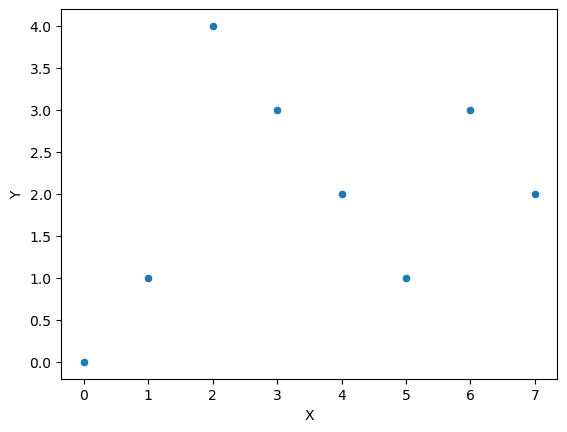

In [38]:
################################################
# Building distance matrix
################################################

df = pd.read_csv('input_ctsp/locations.csv')
sns.scatterplot(data=df, x='X', y='Y')
plt.savefig("spacewalker_locations.png")
coords = df[['X','Y']].values  # returns a numpy array
travel_times = distance_matrix(coords, coords)

# Showing distance matrix
print('Distance Matrix is:\n')
print(np.round(travel_times, 4))

In [50]:
################################################
# Prepare the input
################################################

# Indices
n_satels = len(df) - 1
capacity = 4
n_trips = math.ceil( n_satels / capacity)
satellites = np.arange(1, n_satels + 1)

# Parameters
# Departure times in minutes after 12:00 AM
#failure_times = np.array([19, 19, 25, 30, 20, 35, 17])  
# failure_times = np.array([34, 34, 34, 34, 34, 34, 30]) 
rng = np.random.default_rng(seed=12345)
failure_times = rng.integers(19, 36, size =  n_satels)

# Time at which the astronaut team can start their spacewalks (12:00 AM, 0 minutes)
T = 0  

# Repair time per satellite in minutes
U = 2  

M = 100000  # Big M

################################################
# Solving the integer programming problem
################################################

# Defining the decision variables

# x_ijk: Binary variable for each trip, dim = 8*8*2
x = [cp.Variable(( n_satels + 1,  n_satels + 1), boolean=True) for _ in range(n_trips)] 

# u_ik: Start time of repair at satellite i during trip k, dim = 7*2
u = cp.Variable(( n_satels, n_trips), nonneg=True)  

# y_ik: Whether satellite i is serviced during trip k, dim = 7 *2
y = cp.Variable(( n_satels, n_trips), boolean=True)  

# Completion time of each trip
C = cp.Variable(n_trips, nonneg=True)  

# Objective function: Minimize total delay
delay = cp.sum(cp.maximum(0, u + U - (failure_times.reshape(-1, 1) - 5)))
objective = cp.Minimize(delay)


# Constraints
constraints = []

# 0. Initial constraintsx_ii = 0 
for k in range(n_trips):
    constraints += [cp.diag(x[k]) == 0]

# 1. Flow conservation
for k in range(n_trips):
    # Start at International Space Station (satellite 0) and must visit each assigned satellite once
    constraints += [ cp.sum(x[k][0, 1:]) == 1 ]
    constraints += [ cp.sum(x[k][1:, 0]) == 1 ]    
    # Each satellite assigned to a trip must have exactly one preceding and one succeeding satellite
    for i in range(1,  n_satels + 1):
        constraints += [ cp.sum(x[k][i, :]) == y[i - 1, k] ]
        constraints += [ cp.sum(x[k][:, i]) == y[i - 1, k] ]

# 2. Assignment constraints: Each satellite must be served exactly once across all trips
for i in range(n_satels):
    constraints += [ cp.sum(y[i, :]) == 1 ]

# 3. Spaceman capacity constraints: No more than 4 satellites in each trip
for k in range(n_trips):
    constraints += [ cp.sum(y[:, k]) <= capacity ]

# 4. Definition of Completion Time, C[k]
constraints += [ C[0] == 0 + cp.sum( cp.multiply(travel_times, x[0]) ) + U * cp.sum(y[:,0]) ]

for k in range(1, n_trips):
    constraints += [ C[k] == C[k-1] + cp.sum( cp.multiply(travel_times, x[k]) )  + U * cp.sum(y[:,k]) ]


# 5. Repair starting time
# for k in range(n_trips):
#     constraints += [u[:,k] >= 0]
    # constraints += [u[1:,k] >= y[1:,k]]
constraints += [u[:,:] >= 0]

# If a satellite is NOT scheduled during a trip, its starting time remains 0
# If it IS visited, then no constraint to repair starting time.
for k in range(n_trips):
    for i in range( n_satels):
        constraints += [u[i,k] <= M * y[i,k] ] 

# This constraint is absorbed by 7.2        
# for k in range(1, n_trips):
#     for i in range( n_satels):
#         constraints += [u[i,k] + M * (1-y[i,k]) >= C[k-1] ] 

    
# 6. [obsolete] Trip Sequencing Constraints (trips must be sequential in time: no overlapping)

# The following may be the same as 7.2
# for i in range(n_satels):
#     constraints += [ u[i, 0] >= 0 + y[i,0] * travel_times[0, i+1] ]

# [caution] The following seemingly true constraint CANNOT hold, as u[i, k] need to be 0 sometimes.
# for k in range(n_trips):
#     for i in range(n_satels):
#         constraints += [ u[i, k] >= C[k-1] + y[i,k] * travel_times[0, i+1] ]
        
# 7. Bounds of repair starting time, u[i,k]

# 7.1 Upper bound: starting time (returning to ISS directly) must be smaller than the completion time of the same trip 
for k in range(n_trips):
    for i in range(n_satels):
        constraints += [ u[i,k] + U + travel_times[i+1, 0] <= C[k] ]

# 7.2 Lower bound: If a satellite is vited in a trip (k), 
#     its repiar starting time () must be greater than the previous completion time.
#     If NOT visited, however, no constraint is imposed to the starting time. 
for k in range(1, n_trips):
    for i in range(n_satels):
        constraints += [ C[k-1] + travel_times[0, i+1] <= u[i,k] + M * (1 - y[i,k]) ]

for i in range(n_satels):
    constraints += [ travel_times[0, i+1] <= u[i,0] + M * (1-y[i,0]) ]

# 8. Subtour elimination constraints
for k in range(n_trips):
    for i in range(1,  n_satels + 1):
        for j in range(1,  n_satels + 1):
            if i != j:
                constraints += [u[i - 1, k] + U + travel_times[i, j] <= u[j - 1, k] + M * (1 - x[k][i, j]) ]

# Solve the problem
prob = cp.Problem(objective, constraints)
prob.solve(verbose=False)

################################################
# Results
################################################

if y.value is not None:
    print(f"Optimal total delay: {prob.value:.2f} minutes")
    print()
    print("Detailed satellite-repair assignments to trips:")
    print()
    
    trip_routes = []
    delayTable = np.zeros((n_satels, n_trips))
    
    for k in range(n_trips):
        print(f"Trip {k + 1}:")
        
        # Extract the route for trip k based on x[k]
        route = []
        current_satellite = 0  # Start from the International Space Station (satellite 0)
        
        while True:
            next_satellite = np.argmax(x[k].value[current_satellite, :])  # Find the next satellite
            if next_satellite == 0:
                break  # End the route when the truck returns to satellite 0 (ISS)
            route.append(next_satellite)  # Add the gate to the route
            current_satellite = next_satellite  # Move to the next satellite
            
        # Print the route in the order the satellites are visited
        for satellite in route:
            unload_time = u.value[satellite - 1, k] + U
            delay = max(0, unload_time + U + 5 - failure_times[satellite - 1])
            delayTable[satellite-1, k] = delay
            print(f"Satellite {satellite} completes unloading: {unload_time:.2f} minutes after 12:00 AM, late by {delay:.1f} minutes.")
        
        #print(route)
        excursion = route
        excursion.insert(0,0)
        excursion.append(0)
        trip_routes.append(excursion)
        #print(excursion)
        #print(trip_routes)
        print()
        
else:
    print("No feasible solution found.")

Optimal total delay: 17.87 minutes

Detailed satellite-repair assignments to trips:

Trip 1:
Satellite 2 completes unloading: 6.47 minutes after 12:00 AM, late by 0.0 minutes.
Satellite 3 completes unloading: 9.89 minutes after 12:00 AM, late by 0.0 minutes.
Satellite 4 completes unloading: 13.30 minutes after 12:00 AM, late by 0.0 minutes.
Satellite 5 completes unloading: 16.71 minutes after 12:00 AM, late by 1.7 minutes.

Trip 2:
Satellite 1 completes unloading: 25.23 minutes after 12:00 AM, late by 2.2 minutes.
Satellite 6 completes unloading: 32.61 minutes after 12:00 AM, late by 7.6 minutes.
Satellite 7 completes unloading: 36.03 minutes after 12:00 AM, late by 14.0 minutes.



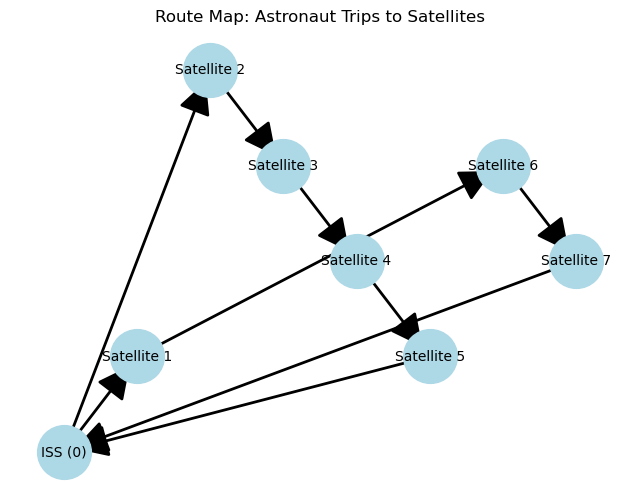

In [47]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes for the satellites and the International Space Station (ISS)
# n_gates = n_satels
G.add_node(0, pos=(0, 0), label="ISS (0)")  # ISS

# for i in range(1, n_satels + 1):
#     G.add_node(i, pos=(i, 0), label=f"Satellite {i}")

for i in range(1, n_satels + 1):
    G.add_node(i, pos=tuple(coords[i]), label=f"Satellite {i}")
    

# Example routes for two trips (from Gantt chart data)
# trip_routes = [
#     [0, 1, 2, 3, 0],  # Trip 1: ISS -> Satellite 1 -> Satellite 2 -> Satellite 3 -> ISS
#     [0, 4, 5, 6, 7, 0]  # Trip 2: ISS -> Satellite 4 -> Satellite 5 -> Satellite 6 -> Satellite 7 -> ISS
# ]

# Add edges based on the route
for route in trip_routes:
    for i in range(len(route) - 1):
        G.add_edge(route[i], route[i + 1])

# Get positions for nodes
pos = nx.get_node_attributes(G, 'pos')

# Plot the graph
plt.figure(figsize=(8, 6))

# Draw nodes with labels
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1500)
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=10)

# Draw the edges with arrows representing the trips
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black', arrowstyle='-|>', arrowsize=50, width=2.0)

# Set the title and display the route map
plt.title('Route Map: Astronaut Trips to Satellites')
plt.axis('off')
plt.savefig("spacewalker_routes.png")
plt.show()

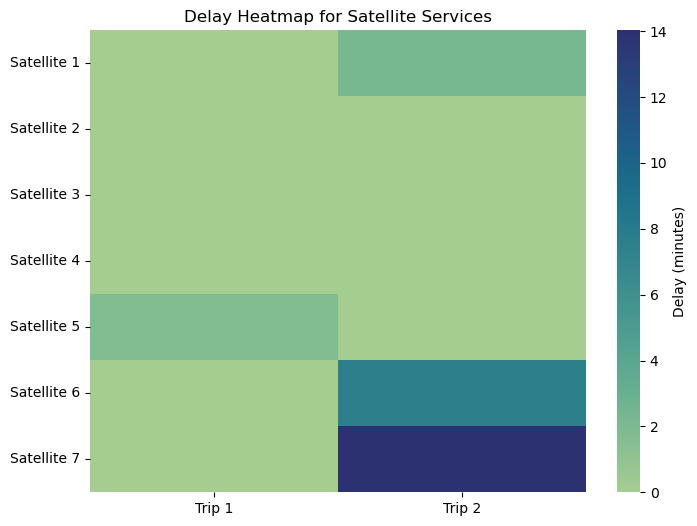

In [48]:
# Sample delay data for two trips (in minutes)
# Each row represents a satellite (gate) and each column represents a trip
# For simplicity, you can input the actual delays computed in your solution
# delays = np.array([
#     [2, 0],  # Satellite 1: 2 minutes delay in Trip 1, 0 minutes in Trip 2
#     [3, 0],  # Satellite 2
#     [1, 0],  # Satellite 3
#     [0, 5],  # Satellite 4
#     [0, 2],  # Satellite 5
#     [0, 3],  # Satellite 6
#     [0, 1],  # Satellite 7
# ])

# Define labels for the satellites (gates) and trips
satellites = [f"Satellite {i}" for i in range(1, n_satels+1)]  # ["Satellite 1", ..., "Satellite 7"]
trips = [f"Trip {i}" for i in range(1, n_trips+1)]  # ["Trip 1", "Trip 2"]

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(delayTable, annot=False, cmap="crest", xticklabels=trips, yticklabels=satellites, cbar_kws={'label': 'Delay (minutes)'})

# Add labels and title
plt.title('Delay Heatmap for Satellite Services')

plt.savefig("spacewalker_heatmap.png")

#plt.xlabel('Trips')
#plt.ylabel('Satellites')

# Display the heatmap
plt.show()